<a href="https://colab.research.google.com/github/Aynahd/Y24/blob/main/RCNN_model2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'airplanes-dataset-for-rcnn:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F985493%2F1664328%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240430%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240430T195802Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D8c02d1a8d0190b14e49ee79932572ce7a53f84fb6ade1487e5daf29217ebfc12d0c35c1941c8bf5aab516da28ce278342701d192cdd9edce1a06f7e0c44f1c5b6f7849c1c18671f74ab9e6e1c7418a5ea97a32502498ed81b521eb49965dc28a89b03e747c3d1114e8a6da703c7b5192d1119d4cf7d99997338bac23629c4c858234b7d258979b1e690777e51e6f100c4f0562c50d0d6a73358597c44b24350875b833a49f21ce39c89f77ee10b2c9c5c97077628403a57fdea36ce4827292804f35ad37dc184fedd7f85898fe776b6e1b6072f14242d7cb86220bdb8745e736127a5148a8d7ba3a0f67cf2cd179c400764141c992647368ab555734661b08dd'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 12895593 bytes downloaded
Downloaded and uncompressed: airplanes-dataset-for-rcnn
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airplanes-dataset-for-rcnn/Images/Images/airplane_623.jpg
/kaggle/input/airplanes-dataset-for-rcnn/Images/Images/airplane_554.jpg
/kaggle/input/airplanes-dataset-for-rcnn/Images/Images/airplane_014.jpg
/kaggle/input/airplanes-dataset-for-rcnn/Images/Images/airplane_055.jpg
/kaggle/input/airplanes-dataset-for-rcnn/Images/Images/airplane_662.jpg
/kaggle/input/airplanes-dataset-for-rcnn/Images/Images/airplane_453.jpg
/kaggle/input/airplanes-dataset-for-rcnn/Images/Images/airplane_203.jpg
/kaggle/input/airplanes-dataset-for-rcnn/Images/Images/airplane_070.jpg
/kaggle/input/airplanes-dataset-for-rcnn/Images/Images/airplane_060.jpg
/kaggle/input/airplanes-dataset-for-rcnn/Images/Images/airplane_156.jpg
/kaggle/input/airplanes-dataset-for-rcnn/Images/Images/42849.jpg
/kaggle/input/airplanes-dataset-for-rcnn/Images/Images/airplane_460.jpg
/kaggle/input/airplanes-dataset-for-rcnn/Images/Images/airplane_663.jpg
/kaggle/input/airplanes-dataset-for-rcnn/Images/Images/airplane_157.jpg

In [3]:
!pip uninstall opencv-python -y
!pip uninstall opencv-contrib-python -y
!pip uninstall opencv-python-headless -y
!pip uninstall opencv-contrib-python-headless -y
!pip uninstall opencv-contrib-python opencv-python
!pip install opencv-contrib-python


Found existing installation: opencv-python 4.8.0.76
Uninstalling opencv-python-4.8.0.76:
  Successfully uninstalled opencv-python-4.8.0.76
Found existing installation: opencv-contrib-python 4.8.0.76
Uninstalling opencv-contrib-python-4.8.0.76:
  Successfully uninstalled opencv-contrib-python-4.8.0.76
Found existing installation: opencv-python-headless 4.9.0.80
Uninstalling opencv-python-headless-4.9.0.80:
  Successfully uninstalled opencv-python-headless-4.9.0.80
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.3/68.3 MB 6.1 MB/s eta 0:00:00


In [4]:
import tensorflow_datasets as tfds
import os,cv2,keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#from tqdm.notebook import tqdm
from tqdm import tqdm
import time
import random

from keras.layers import Dense
from keras import Model
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.applications.vgg16 import VGG16

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

from keras.callbacks import ModelCheckpoint, EarlyStopping


In [5]:
def get_iou(bb1, bb2):
    assert bb1['x1'] < bb1['x2']
    assert bb1['y1'] < bb1['y2']
    assert bb2['x1'] < bb2['x2']
    assert bb2['y1'] < bb2['y2']

    x_left = max(bb1['x1'], bb2['x1'])
    y_top = max(bb1['y1'], bb2['y1'])
    x_right = min(bb1['x2'], bb2['x2'])
    y_bottom = min(bb1['y2'], bb2['y2'])

    if x_right < x_left or y_bottom < y_top:
        return 0.0
    intersection_area = (x_right - x_left) * (y_bottom - y_top)
    bb1_area = (bb1['x2'] - bb1['x1']) * (bb1['y2'] - bb1['y1'])
    bb2_area = (bb2['x2'] - bb2['x1']) * (bb2['y2'] - bb2['y1'])
    iou = intersection_area / float(bb1_area + bb2_area - intersection_area)
    assert iou >= 0.0
    assert iou <= 1.0
    return iou

In [6]:
def get_rectangle(csv_annot):
    df = pd.read_csv(csv_annot)
    boxes=[]
    for row in df.iterrows():
        x1 = int(row[1][0].split(" ")[0])
        y1 = int(row[1][0].split(" ")[1])
        x2 = int(row[1][0].split(" ")[2])
        y2 = int(row[1][0].split(" ")[3])
        box={"x1":x1,"x2":x2,"y1":y1,"y2":y2}
        boxes.append(box)
    return boxes

In [7]:
def rectang_from_image(image,x,y,w,h):
    timage = image[y:y+h,x:x+w]
    resized = cv2.resize(timage,
                     (224,224),
                     interpolation = cv2.INTER_AREA)
    return resized

In [8]:
max_proposal = 2000
max_samples = 30
IOU_treshold_plane = 0.7
IOU_treshold_background = 0.3

dataset_path = "../input/airplanes-dataset-for-rcnn/Images/Images"
annot="../input/airplanes-dataset-for-rcnn/Airplanes_Annotations/Airplanes_Annotations"

ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

train_images=[]
train_labels=[]
images=os.listdir(dataset_path)

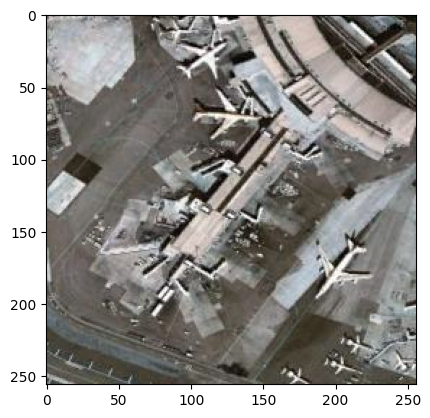

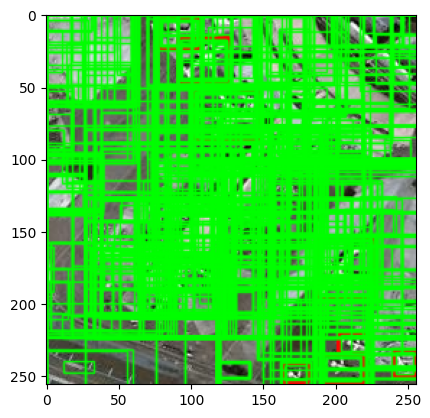

In [9]:
img_name=random.choice(images)
img = cv2.imread(os.path.join(dataset_path,img_name))
plt.imshow(img)
csv_file = os.path.join(annot,str(img_name).split(".")[0]+".csv")
boxes=get_rectangle(csv_file)
for box in boxes:
    cv2.rectangle(img,(box['x1'],box['y1']),(box['x2'],box['y2']),(255,0,0), 2)
plt.figure()
plt.imshow(img)

cv2.setUseOptimized(True);
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
ss.setBaseImage(img)
ss.switchToSelectiveSearchFast()
rects = ss.process()
imOut = img.copy()
for i, rect in (enumerate(rects)):
    x, y, w, h = rect
    cv2.rectangle(imOut, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
# plt.figure()
plt.imshow(imOut)


In [ ]:
for file in tqdm(images[:100], desc="creating dataset"):
    try:
        box_values=[]
        image=cv2.imread(os.path.join(dataset_path,file))
        csv_path = os.path.join(annot,file.split(".")[0]+".csv")
        box_values.extend(get_rectangle(csv_path))
        ss.setBaseImage(image)
        ss.switchToSelectiveSearchFast()
        ssresults = ss.process()
        imout = image.copy()
        counter=flag=falsecounter=fflag=bflag = 0
        for e, result in  enumerate(ssresults):
            if e< max_proposal and flag==0:
                for a_box in box_values:
                    x,y,w,h = result
                    iou = get_iou(a_box,{"x1":x,"x2":x+w,"y1":y,"y2":y+h})
                    if counter < max_samples:
                        if iou > IOU_treshold_plane:
                            train_images.append(rectang_from_image(image,x,y,w,h))
                            train_labels.append(1)
                            counter +=1
                    else:
                        fflag = 1
                    if falsecounter < max_samples:
                        if iou < IOU_treshold_background:
                            train_images.append(rectang_from_image(image,x,y,w,h))
                            train_labels.append(0)
                            falsecounter += 1
                    else:
                        bflag = 1
                if fflag == 1 and bflag==1:
                    flag=1
    except Exception as e:
        print(e)
        continue

creating dataset:  49%|████▉     | 49/100 [00:52<00:45,  1.13it/s]

In [ ]:
vggmodel = VGG16(weights='imagenet', include_top=True)

for layers in (vggmodel.layers)[:15]:
    print(layers)
    layers.trainable = False

X= vggmodel.layers[-2].output
predictions = Dense(1, activation="sigmoid")(X)
model_final = Model(vggmodel.input,predictions)
opt = Adam(lr=0.0001)
model_final.compile(loss = keras.losses.binary_crossentropy, optimizer = opt, metrics=["accuracy"])
model_final.summary()

In [ ]:
X_new = np.array(train_images)
y_new = np.array(train_labels)

X_train, X_test , y_train, y_test = train_test_split(X_new,y_new,test_size=0.10)

trdata    = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=0)
traindata = trdata.flow(x=X_train, y=y_train)
tsdata    = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=0)
testdata  = tsdata.flow(x=X_test, y=y_test)

In [ ]:
checkpoint = ModelCheckpoint("ieeercnn_vgg16_1.h5",
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             save_weights_only=False,
                             mode='auto', period=1)

early = EarlyStopping(monitor='val_loss',
                      min_delta=0,
                      patience=100,
                      verbose=1,
                      mode='auto')

hist = model_final.fit_generator(generator= traindata,
                                 steps_per_epoch= 10,
                                 epochs= 100,
                                 validation_data= testdata,
                                 validation_steps=2,
                                 callbacks=[checkpoint,early])

In [ ]:
from IPython.display import HTML
def create_download_link(title = "Download model file", filename = './RNN_model.h5'):
    html = '<a href={filename}>{title}</a>'
    html = html.format(title=title,filename=filename)
    return HTML(html)


model_final.save('./RNN_model.h5')
# create a link to download the model
create_download_link(filename='./RNN_model.h5')

In [ ]:
img=random.choice(images)
img = cv2.imread(os.path.join(dataset_path,img))
ss.setBaseImage(img)
ss.switchToSelectiveSearchFast()
ssresults = ss.process()
imout = img.copy()
for e,result in enumerate(ssresults):
    if e < 2000:
        x,y,w,h = result
        timage = imout[y:y+h,x:x+w]
        resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
        img = np.expand_dims(resized, axis=0)
        out= model_final.predict(img)
        if out[0][0] > 0.7:
            cv2.rectangle(imout, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
plt.figure()
plt.imshow(imout)